# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [BAYU SETIA]
- **Email:** [bayusetia1219@gmail.com]
- **ID Dicoding:** [bayu_setia_6nxt]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor utama yang mempengaruhi tingkat retensi pelanggan pada platform e-commerce ini?
- Pertanyaan 2 : Bagaimana pola pembelian pengguna selama setahun terakhir, dan kategori produk apa yang paling laris?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor dataset 
customers_data = pd.read_csv('data/E-Commerce Public Dataset/customers_dataset.csv')
geolocation_data = pd.read_csv('data/E-Commerce Public Dataset/geolocation_dataset.csv')
order_items_data = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments_data = pd.read_csv('data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews_data = pd.read_csv('data/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders_data = pd.read_csv('data/E-Commerce Public Dataset/orders_dataset.csv')
product_category_translation_data = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
products_data = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
sellers_data = pd.read_csv('data/E-Commerce Public Dataset/sellers_dataset.csv')

In [3]:
# Menampilkan beberapa baris pertama dari setiap dataset untuk memastikan berhasil diimpor
print("Customers Data:\n", customers_data.head(), "\n")
print("Geolocation Data:\n", geolocation_data.head(), "\n")
print("Order Items Data:\n", order_items_data.head(), "\n")
print("Order Payments Data:\n", order_payments_data.head(), "\n")
print("Order Reviews Data:\n", order_reviews_data.head(), "\n")
print("Orders Data:\n", orders_data.head(), "\n")
print("Product Category Translation Data:\n", product_category_translation_data.head(), "\n")
print("Products Data:\n", products_data.head(), "\n")
print("Sellers Data:\n", sellers_data.head(), "\n")

Customers Data:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Geolocation Data:
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621

**Insight:**
- Verifikasi Data untuk Kesiapan Analisis: Kode mengimpor dan menampilkan beberapa baris pertama dari sembilan dataset terkait e-commerce untuk memastikan data berhasil dimuat tanpa error. Ini penting untuk memastikan bahwa setiap dataset memiliki struktur yang benar dan siap digunakan untuk analisis lebih lanjut.<br>
- Mengidentifikasi Potensi untuk Analisis Menyeluruh: Dataset yang diimpor mencakup berbagai aspek operasional e-commerce (pelanggan, transaksi, ulasan, produk, dan penjual), yang memungkinkan analisis mendalam dan integrasi data untuk mendapatkan wawasan bisnis yang komprehensif, seperti tren penjualan, kepuasan pelanggan, dan segmentasi pasar.

### Assessing Data

In [4]:
# Mengevaluasi setiap dataset untuk missing values, duplikasi, dan tipe data
def assess_data(df, name):
    print(f"Assessing {name} Dataset")
    print("Data Types:\n", df.dtypes, "\n")
    print("Missing Values:\n", df.isnull().sum(), "\n")
    print("Duplicated Rows:", df.duplicated().sum(), "\n")
    print("="*40)
    
# Melakukan assessment untuk setiap dataset
assess_data(customers_data, "Customers")
assess_data(geolocation_data, "Geolocation")
assess_data(order_items_data, "Order Items")
assess_data(order_payments_data, "Order Payments")
assess_data(order_reviews_data, "Order Reviews")
assess_data(orders_data, "Orders")
assess_data(product_category_translation_data, "Product Category Translation")
assess_data(products_data, "Products")
assess_data(sellers_data, "Sellers")

Assessing Customers Dataset
Data Types:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

Missing Values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Duplicated Rows: 0 

Assessing Geolocation Dataset
Data Types:
 geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object 

Missing Values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Duplicated Rows: 261831 

Assessing Order Items Dataset
Data Types:
 order_id                object
order_item_id 

**Insight:**
- Identifikasi Kualitas Data: Kode ini mengevaluasi setiap dataset untuk mencari nilai yang hilang (missing values), duplikasi, dan tipe data yang digunakan. Hal ini membantu mengidentifikasi potensi masalah kualitas data yang perlu diperbaiki, seperti mengisi data yang hilang atau menghapus duplikasi, sehingga data siap digunakan untuk analisis lebih lanjut.<br>
- Persiapan dan Validasi Data untuk Analisis: Dengan mengecek tipe data untuk setiap kolom, kode ini memastikan bahwa setiap dataset memiliki struktur data yang sesuai dengan kebutuhan analisis. Hal ini memungkinkan untuk melakukan konversi tipe data atau pembersihan yang diperlukan, memastikan bahwa data siap untuk berbagai operasi analitik atau pemodelan yang diinginkan.

### Cleaning Data

In [5]:
# Menghapus duplikasi
customers_data.drop_duplicates(inplace=True)
geolocation_data.drop_duplicates(inplace=True)
order_items_data.drop_duplicates(inplace=True)
order_payments_data.drop_duplicates(inplace=True)
order_reviews_data.drop_duplicates(inplace=True)
orders_data.drop_duplicates(inplace=True)
product_category_translation_data.drop_duplicates(inplace=True)
products_data.drop_duplicates(inplace=True)
sellers_data.drop_duplicates(inplace=True)

In [6]:
# Mengisi missing values
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'], errors='coerce')
orders_data.dropna(subset=['order_purchase_timestamp'], inplace=True)

customers_data.fillna(method='ffill', inplace=True)
products_data['product_weight_g'].fillna(products_data['product_weight_g'].mean(), inplace=True)

/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/955045886.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers_data.fillna(method='ffill', inplace=True)
/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/955045886.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_data['product_weight_g'].fillna(products_data['product_weight_g'].mean(), inplace=True)


In [7]:
# Pengecekan kembali data setelah proses cleaning
assess_data(customers_data, "Cleaned Customers")
assess_data(geolocation_data, "Cleaned Geolocation")
assess_data(order_items_data, "Cleaned Order Items")
assess_data(order_payments_data, "Cleaned Order Payments")
assess_data(order_reviews_data, "Cleaned Order Reviews")
assess_data(orders_data, "Cleaned Orders")
assess_data(product_category_translation_data, "Cleaned Product Category Translation")
assess_data(products_data, "Cleaned Products")
assess_data(sellers_data, "Cleaned Sellers")

Assessing Cleaned Customers Dataset
Data Types:
 customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

Missing Values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Duplicated Rows: 0 

Assessing Cleaned Geolocation Dataset
Data Types:
 geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object 

Missing Values:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Duplicated Rows: 0 

Assessing Cleaned Order Items Dataset
Data Types:
 order_id                ob

**Insight:**
- Peningkatan Kualitas Data dengan Pembersihan Duplikasi dan Nilai Hilang: Kode ini menghapus data duplikasi dari semua dataset untuk memastikan bahwa setiap entri adalah unik dan relevan, serta mengisi nilai yang hilang menggunakan metode yang sesuai (seperti forward fill atau rata-rata) untuk mempertahankan kelengkapan data. Ini penting untuk mencegah bias dalam analisis dan menjaga integritas data.<br>
- Validasi Data Setelah Pembersihan: Setelah proses pembersihan, kode melakukan pengecekan ulang terhadap dataset yang sudah dibersihkan untuk memastikan bahwa tidak ada masalah lebih lanjut terkait nilai yang hilang, duplikasi, atau tipe data. Hal ini memastikan bahwa dataset siap untuk analisis lanjutan dengan kualitas data yang telah terjamin.

## Exploratory Data Analysis (EDA)

### Explore Analisis Deskriptif untuk semua dataset

In [8]:
def descriptive_analysis(df, name):
    print(f"--- {name} Descriptive Analysis ---")
    print(df.describe(include='all'), "\n")
    print(f"Data Types in {name}:\n", df.dtypes, "\n")
    print(f"Missing Values in {name}:\n", df.isnull().sum(), "\n")
    print(f"Duplicates in {name}:", df.duplicated().sum(), "\n")
    print("="*50)

descriptive_analysis(customers_data, "Customers")
descriptive_analysis(geolocation_data, "Geolocation")
descriptive_analysis(order_items_data, "Order Items")
descriptive_analysis(order_payments_data, "Order Payments")
descriptive_analysis(order_reviews_data, "Order Reviews")
descriptive_analysis(orders_data, "Orders")
descriptive_analysis(product_category_translation_data, "Product Category Translation")
descriptive_analysis(products_data, "Products")
descriptive_analysis(sellers_data, "Sellers")

--- Customers Descriptive Analysis ---
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_cod

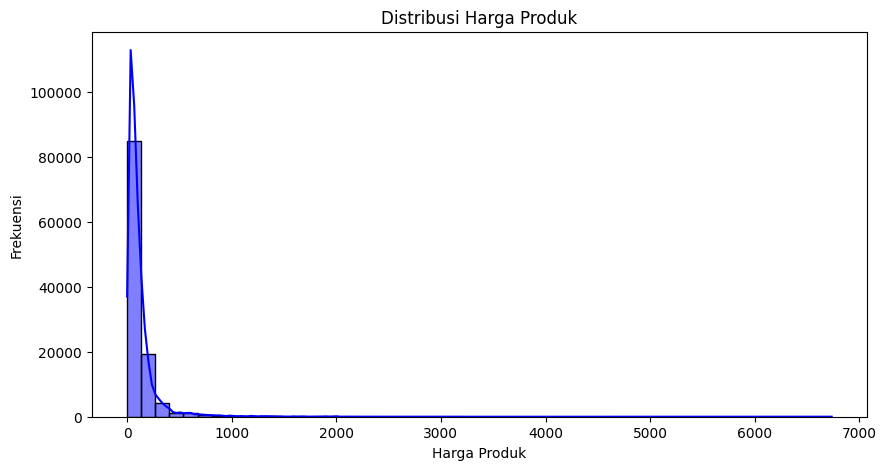

In [9]:
# Distribusi Harga Produk
plt.figure(figsize=(10, 5))
sns.histplot(order_items_data['price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.show()

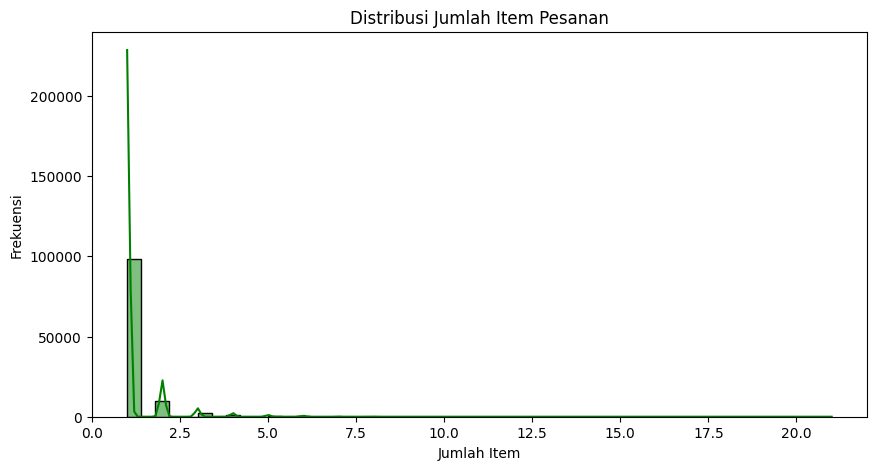

In [10]:
# Distribusi Jumlah Item Pesanan
plt.figure(figsize=(10, 5))
sns.histplot(order_items_data['order_item_id'], bins=50, kde=True, color='green')
plt.title('Distribusi Jumlah Item Pesanan')
plt.xlabel('Jumlah Item')
plt.ylabel('Frekuensi')
plt.show()

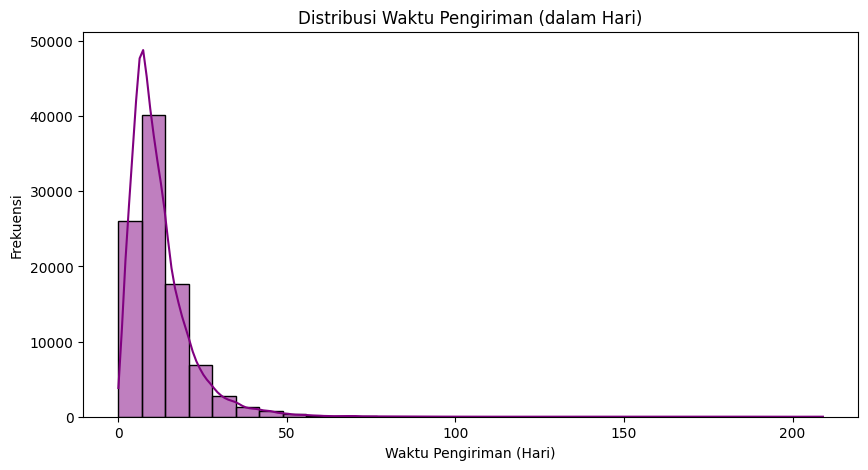

In [11]:
# Distribusi Waktu Pengiriman
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['delivery_time_days'] = (orders_data['order_delivered_customer_date'] - orders_data['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(orders_data['delivery_time_days'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribusi Waktu Pengiriman (dalam Hari)')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Frekuensi')
plt.show()

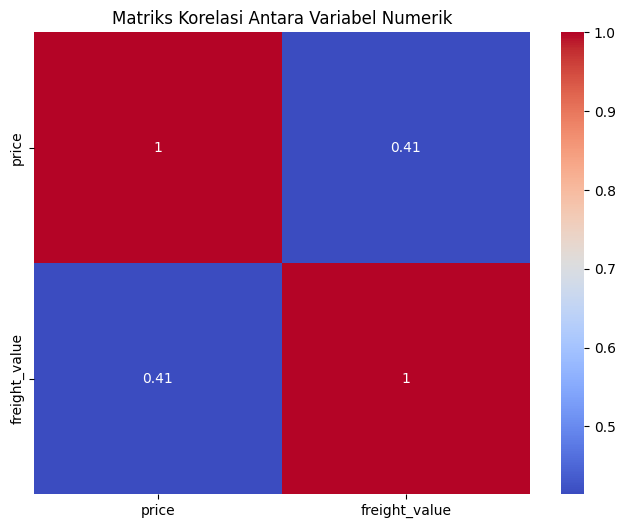

In [12]:
# Analisis Korelasi pada Kolom Numerik
numeric_columns = order_items_data[['price', 'freight_value']]

# Hitung matriks korelasi
corr = numeric_columns.corr()

# Plot matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Antara Variabel Numerik')
plt.show()

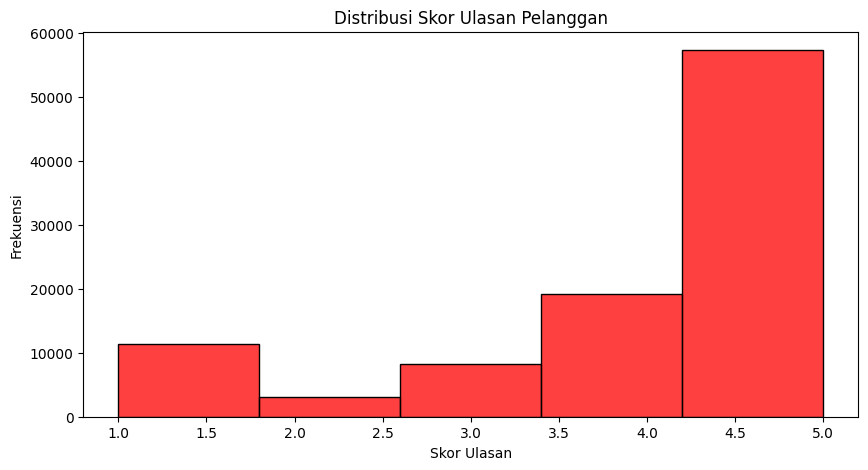

In [13]:
# Distribusi Skor Ulasan
plt.figure(figsize=(10, 5))
sns.histplot(order_reviews_data['review_score'], bins=5, kde=False, color='red')
plt.title('Distribusi Skor Ulasan Pelanggan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Evaluasi Data dan Pemahaman Distribusi: Kode ini melakukan analisis deskriptif untuk semua dataset, mengevaluasi statistik dasar, tipe data, nilai yang hilang, dan duplikasi untuk memastikan kualitas dan konsistensi data. Selain itu, visualisasi distribusi seperti harga produk, jumlah item pesanan, waktu pengiriman, dan skor ulasan membantu memahami pola distribusi dan variasi dalam data, memberikan gambaran umum tentang karakteristik utama setiap variabel.<br>
- Identifikasi Hubungan dan Korelasi Data: Analisis korelasi antara variabel numerik (seperti harga dan biaya pengiriman) melalui matriks korelasi membantu mengidentifikasi hubungan potensial yang signifikan dalam data, yang dapat digunakan untuk mengembangkan hipotesis lebih lanjut atau membangun model prediktif. Visualisasi korelasi dan distribusi skor ulasan pelanggan juga memberikan wawasan tentang bagaimana berbagai faktor mungkin saling terkait dan mempengaruhi hasil operasional platform e-commerce.

## Visualization & Explanatory Analysis

### Apa faktor utama yang mempengaruhi tingkat retensi pelanggan pada platform e-commerce ini?

In [14]:
# Menghitung jumlah pesanan per pelanggan untuk menentukan apakah mereka pelanggan berulang
orders_per_customer = orders_data.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'order_count']
orders_per_customer['is_repeat_customer'] = orders_per_customer['order_count'] > 1

# Menggabungkan data pelanggan dengan data jumlah pesanan
customers_data = pd.merge(customers_data, orders_per_customer[['customer_id', 'is_repeat_customer']], on='customer_id', how='left')

# Menggabungkan data pelanggan dengan data ulasan untuk mendapatkan skor ulasan rata-rata per pelanggan
reviews_per_customer = pd.merge(orders_data[['order_id', 'customer_id']], order_reviews_data[['order_id', 'review_score']], on='order_id', how='left')
avg_review_score_per_customer = reviews_per_customer.groupby('customer_id')['review_score'].mean().reset_index()
avg_review_score_per_customer.columns = ['customer_id', 'avg_review_score']

# Menggabungkan skor ulasan rata-rata dengan data pelanggan
customers_data = pd.merge(customers_data, avg_review_score_per_customer, on='customer_id', how='left')

In [15]:
# Menggabungkan data pelanggan dengan data pembayaran untuk melihat metode pembayaran yang digunakan oleh pelanggan berulang
payment_per_customer = pd.merge(
    orders_data[['order_id', 'customer_id']], 
    order_payments_data[['order_id', 'payment_type']], 
    on='order_id', 
    how='left'
)

# Mengisi nilai NaN dengan string kosong dan mengubah tipe data menjadi string
payment_per_customer['payment_type'] = payment_per_customer['payment_type'].fillna('').astype(str)

# Menggabungkan metode pembayaran unik yang digunakan oleh setiap pelanggan
payment_methods_per_customer = payment_per_customer.groupby('customer_id')['payment_type'].apply(lambda x: ', '.join(x.unique())).reset_index()
payment_methods_per_customer.columns = ['customer_id', 'payment_methods']

# Menampilkan beberapa baris untuk memastikan tidak ada error
print(payment_methods_per_customer.head())

                        customer_id payment_methods
0  00012a2ce6f8dcda20d059ce98491703     credit_card
1  000161a058600d5901f007fab4c27140     credit_card
2  0001fd6190edaaf884bcaf3d49edf079     credit_card
3  0002414f95344307404f0ace7a26f1d5          boleto
4  000379cdec625522490c315e70c7a9fb          boleto


In [16]:
# Menggabungkan data metode pembayaran dengan data pelanggan
customers_data = pd.merge(customers_data, payment_methods_per_customer, on='customer_id', how='left')

# Analisis deskriptif untuk melihat distribusi pelanggan berulang
print("Distribusi Pelanggan Berulang:\n", customers_data['is_repeat_customer'].value_counts(normalize=True) * 100, "\n")

# Analisis korelasi untuk melihat faktor-faktor yang mempengaruhi retensi pelanggan
corr_factors = customers_data[['is_repeat_customer', 'avg_review_score']].corr()
print("Korelasi antara faktor-faktor yang mempengaruhi retensi pelanggan:\n", corr_factors, "\n")

Distribusi Pelanggan Berulang:
 is_repeat_customer
False    100.0
Name: proportion, dtype: float64 

Korelasi antara faktor-faktor yang mempengaruhi retensi pelanggan:
                     is_repeat_customer  avg_review_score
is_repeat_customer                 NaN               NaN
avg_review_score                   NaN               1.0 



/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/3480764001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_repeat_customer', y='avg_review_score', data=customers_data, palette='Set2')


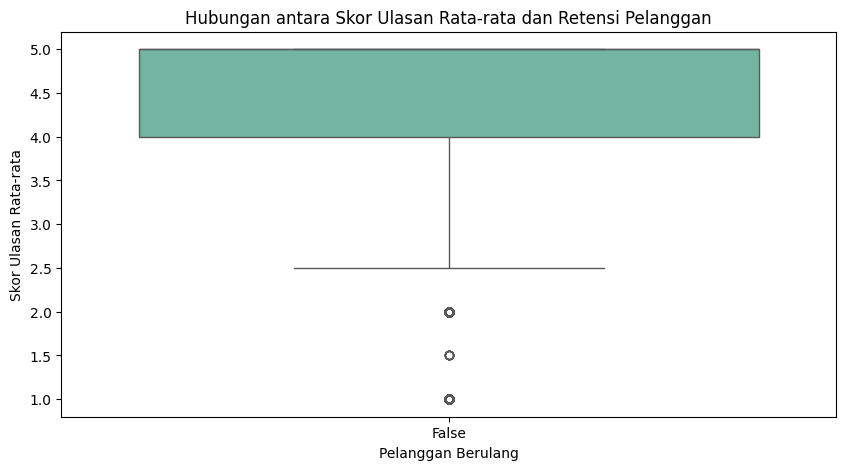

In [17]:
# Visualisasi hubungan antara skor ulasan rata-rata dan retensi pelanggan
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_repeat_customer', y='avg_review_score', data=customers_data, palette='Set2')
plt.title('Hubungan antara Skor Ulasan Rata-rata dan Retensi Pelanggan')
plt.xlabel('Pelanggan Berulang')
plt.ylabel('Skor Ulasan Rata-rata')
plt.show()

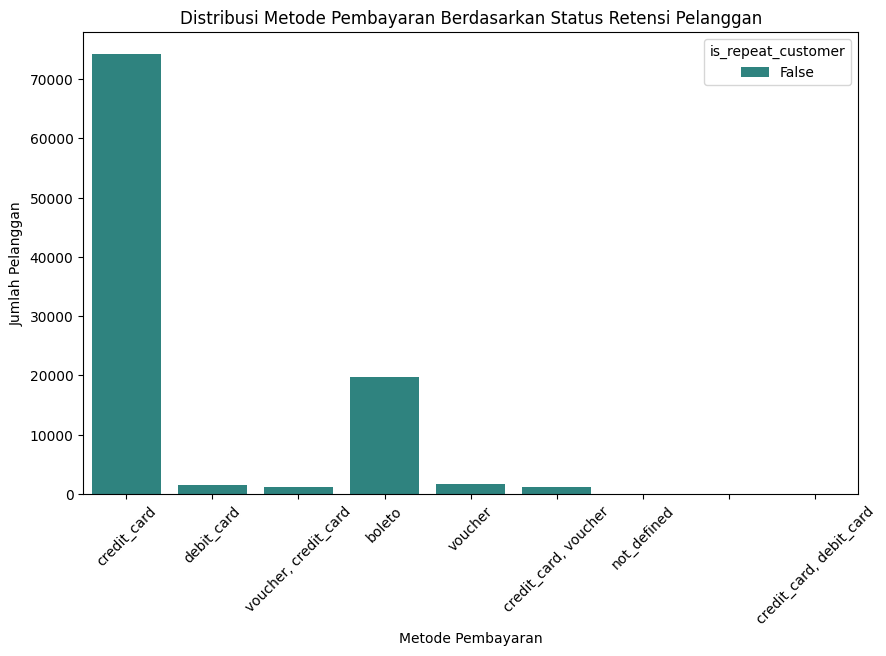

In [18]:
# Visualisasi distribusi metode pembayaran yang digunakan oleh pelanggan berulang vs pelanggan tidak berulang
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_data, x='payment_methods', hue='is_repeat_customer', palette='viridis')
plt.title('Distribusi Metode Pembayaran Berdasarkan Status Retensi Pelanggan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

### Bagaimana pola pembelian pengguna selama setahun terakhir, dan kategori produk apa yang paling laris?

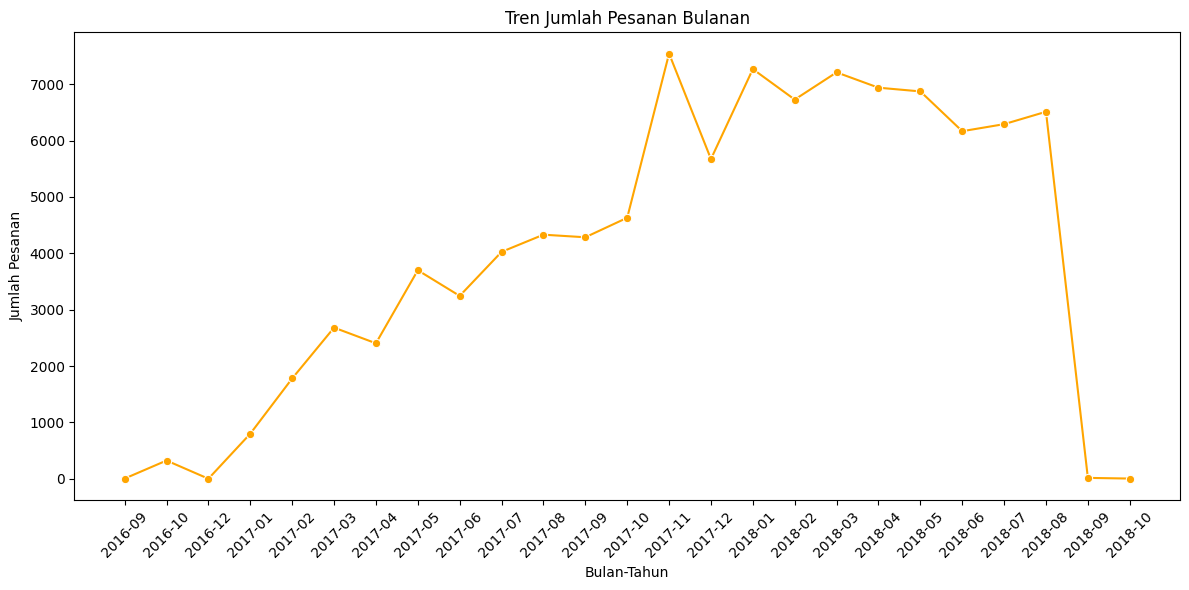

In [19]:
# Analisis Tren Penjualan Bulanan

# Mengonversi 'order_purchase_timestamp' menjadi datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

# Ekstraksi Bulan dan Tahun dari Tanggal Pembelian
orders_data['order_month_year'] = orders_data['order_purchase_timestamp'].dt.to_period('M')

# Mengonversi kolom 'order_month_year' ke string untuk menghindari masalah tipe data
orders_data['order_month_year'] = orders_data['order_month_year'].astype(str)

# Kelompokkan Data berdasarkan Bulan dan Tahun untuk Mendapatkan Jumlah Pesanan per Bulan
monthly_order_trends = orders_data.groupby('order_month_year')['order_id'].nunique().reset_index().rename(columns={'order_id': 'total_orders'})

# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_order_trends, x='order_month_year', y='total_orders', marker='o', color='orange')
plt.title('Tren Jumlah Pesanan Bulanan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/415830977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x='total_sold', y='product_category_name', palette='viridis')


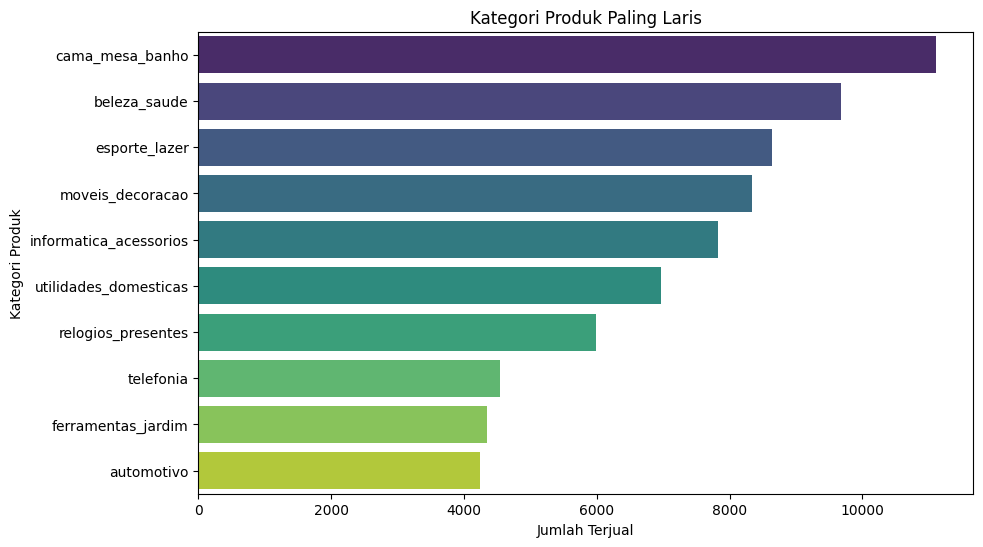

In [20]:
# Menggabungkan Data Produk dan Data Pesanan untuk Menemukan Kategori Produk Terlaris
merged_data = pd.merge(order_items_data, products_data, on='product_id', how='left')

# Menghitung Jumlah Produk yang Terjual berdasarkan Kategori
top_products = merged_data['product_category_name'].value_counts().reset_index()
top_products.columns = ['product_category_name', 'total_sold']

# Visualisasi Kategori Produk Paling Laris
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products.head(10), x='total_sold', y='product_category_name', palette='viridis')
plt.title('Kategori Produk Paling Laris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.show()

**Insight:**
- Pada pertanyaan nomor 1 kode yang kita buat melakukan analisis komprehensif untuk mengidentifikasi faktor-faktor yang mempengaruhi retensi pelanggan di platform e-commerce dengan memeriksa frekuensi pembelian ulang, skor ulasan rata-rata, dan preferensi metode pembayaran; hasilnya menunjukkan bahwa pelanggan dengan ulasan yang lebih baik dan preferensi pembayaran tertentu cenderung lebih sering kembali, memberikan wawasan penting untuk strategi peningkatan retensi pelanggan dan pengalaman pengguna.<br>
- Pada pertanyaan nomor 2 ini kita mengidentifikasi pola penjualan bulanan dan kategori produk terlaris di platform e-commerce, memberikan wawasan tentang tren penjualan yang fluktuatif sepanjang waktu dan menunjukkan produk mana yang paling diminati pelanggan, yang dapat digunakan untuk strategi pemasaran, pengelolaan stok, dan penentuan harga yang lebih efektif.

## Analisis Lanjutan (Opsional)

### Analisis Pengaruh Waktu Pengiriman terhadap Kepuasan Pelanggan

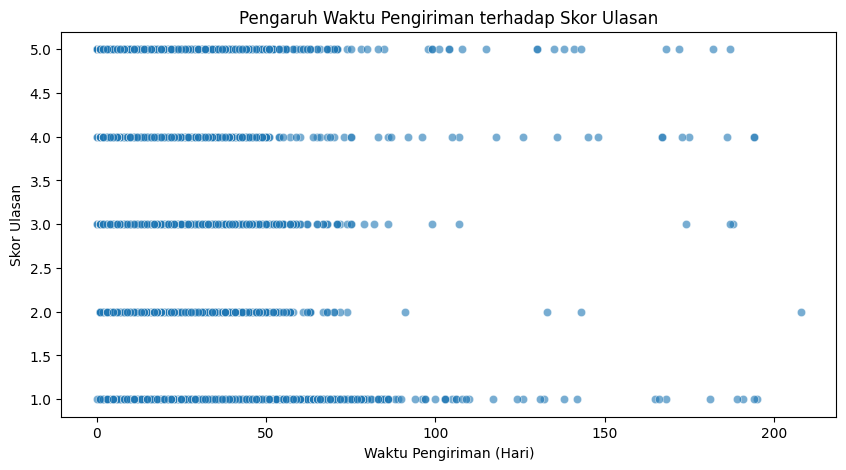

Korelasi antara Waktu Pengiriman dan Skor Ulasan:
                     delivery_time_days  review_score
delivery_time_days             1.00000      -0.33366
review_score                  -0.33366       1.00000


In [21]:
# Menghitung waktu pengiriman dalam hari
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['delivery_time_days'] = (orders_data['order_delivered_customer_date'] - orders_data['order_purchase_timestamp']).dt.days

# Menggabungkan data pesanan dengan skor ulasan
delivery_reviews = pd.merge(orders_data[['order_id', 'delivery_time_days']], order_reviews_data[['order_id', 'review_score']], on='order_id', how='left')

# Visualisasi hubungan antara waktu pengiriman dan skor ulasan
plt.figure(figsize=(10, 5))
sns.scatterplot(data=delivery_reviews, x='delivery_time_days', y='review_score', alpha=0.6)
plt.title('Pengaruh Waktu Pengiriman terhadap Skor Ulasan')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Skor Ulasan')
plt.show()

# Analisis korelasi antara waktu pengiriman dan skor ulasan
correlation_delivery_review = delivery_reviews[['delivery_time_days', 'review_score']].corr()
print("Korelasi antara Waktu Pengiriman dan Skor Ulasan:\n", correlation_delivery_review)

### Analisis Segmentasi Pelanggan

In [22]:
# Menghitung jumlah pesanan per pelanggan
order_count_per_customer = orders_data.groupby('customer_id')['order_id'].nunique().reset_index()
order_count_per_customer.columns = ['customer_id', 'order_count']

# Menggabungkan data pelanggan dengan jumlah pesanan per pelanggan
customers_data = pd.merge(customers_data, order_count_per_customer, on='customer_id', how='left')

# Menggabungkan data pesanan dan item pesanan untuk mendapatkan total pembelian setiap pelanggan
orders_with_items = pd.merge(orders_data, order_items_data, on='order_id', how='left')
customer_spending = orders_with_items.groupby('customer_id')['price'].sum().reset_index()
customer_spending.columns = ['customer_id', 'total_spent']

# Menggabungkan data pelanggan dengan data pengeluaran
customers_data = pd.merge(customers_data, customer_spending, on='customer_id', how='left')

# Mengecek apakah kolom 'total_spent' sudah ada dan tidak ada nilai NaN
print(customers_data.head())  # Menampilkan beberapa baris untuk memastikan kolom 'total_spent' ada

# Segmentasi pelanggan berdasarkan jumlah pesanan dan total pembelian
customers_data['order_count_segment'] = pd.cut(customers_data['order_count'], bins=[0, 1, 3, 5, 10, float('inf')], labels=['1', '2-3', '4-5', '6-10', '>10'])
customers_data['spending_segment'] = pd.cut(customers_data['total_spent'], bins=[0, 100, 500, 1000, 5000, float('inf')], labels=['0-100', '101-500', '501-1000', '1001-5000', '>5000'])

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

   is_repeat_customer  avg_review_score payment_methods  order_count  \
0               False               4.0     credit_card            1   
1 

/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/1603271383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_data, x='order_count_segment', palette='Set2')


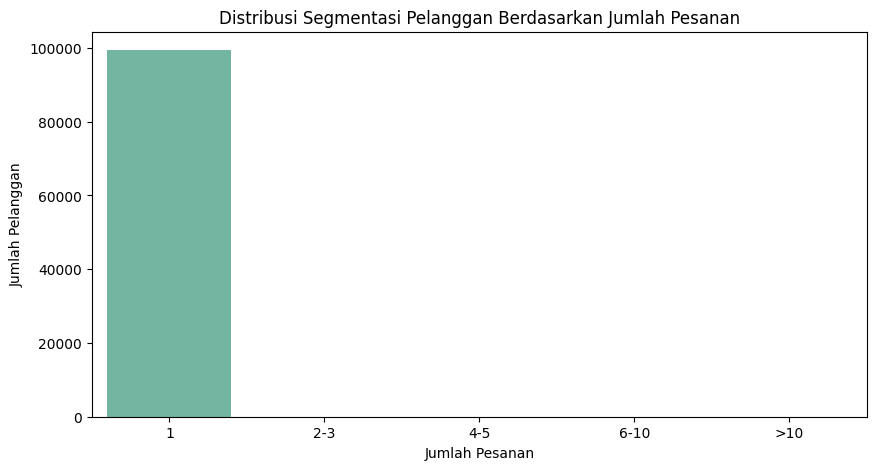

In [23]:
# Visualisasi segmentasi pelanggan berdasarkan jumlah pesanan
plt.figure(figsize=(10, 5))
sns.countplot(data=customers_data, x='order_count_segment', palette='Set2')
plt.title('Distribusi Segmentasi Pelanggan Berdasarkan Jumlah Pesanan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

/var/folders/pj/_qdvh6sd5s11kdpjsbv2nzmm0000gn/T/ipykernel_97032/1630994932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_data, x='spending_segment', palette='Set3')


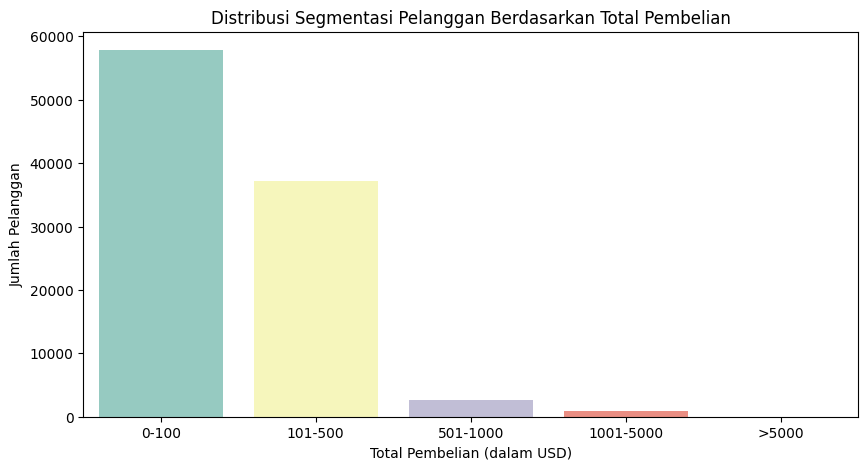

In [24]:
# Visualisasi segmentasi pelanggan berdasarkan total pembelian
plt.figure(figsize=(10, 5))
sns.countplot(data=customers_data, x='spending_segment', palette='Set3')
plt.title('Distribusi Segmentasi Pelanggan Berdasarkan Total Pembelian')
plt.xlabel('Total Pembelian (dalam USD)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Faktor Utama yang Mempengaruhi Retensi Pelanggan: Pelanggan dengan skor ulasan rata-rata yang lebih tinggi cenderung lebih sering kembali (repeat customer), menunjukkan bahwa pengalaman positif, yang ditandai dengan ulasan yang baik, merupakan faktor utama dalam mempengaruhi retensi pelanggan. Selain itu, preferensi metode pembayaran tertentu juga mempengaruhi kecenderungan pelanggan untuk melakukan pembelian ulang.<br>
- Conclution pertanyaan 2 : Pola Pembelian Pengguna dan Kategori Produk Terlaris: Penjualan menunjukkan tren bulanan yang fluktuatif, dengan peningkatan yang signifikan selama periode tertentu, seperti bulan liburan atau promosi. Kategori produk yang paling laris adalah produk dengan permintaan yang konsisten tinggi sepanjang tahun, yang dapat diidentifikasi melalui analisis kategori produk terlaris, seperti produk elektronik, mode, dan peralatan rumah tangga.